[0.017391816463484651, 0.044021589881325027, 0.088783511529018769, 0.14268384199523187, 0.18273171535910021, 0.18649221437768732, 0.15167570676999842, 0.098303891684449307, 0.050769829820274559, 0.020892603849901104]
Power_divergenceResult(statistic=7.1652073136495877, pvalue=0.61992358134687642)
Obsv 		 Exp
3.0 		 1.73918164635
4.0 		 4.40215898813
10.0 		 8.8783511529
9.0 		 14.2683841995
25.0 		 18.2731715359
17.0 		 18.6492214378
13.0 		 15.167570677
9.0 		 9.83038916844
7.0 		 5.07698298203
3.0 		 2.08926038499


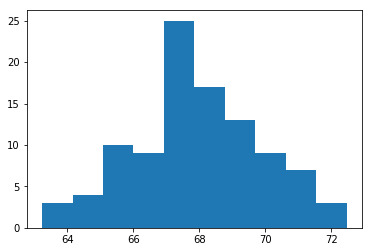

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from scipy.stats import norm, chisquare

df = pd.read_csv('height-weight.csv')
sample_size = 100
nbins = 10

sample = df.height.sample(sample_size)
mean = np.mean(sample)
sd = np.std(sample, ddof=1)

obsv_count, bins, patches = plt.hist(sample, bins =nbins)

#getting z scores for the bins
z = [(x - mean)/sd for x in bins]

#getting area between the z-scores
prob = [norm.cdf(z[i+1]) - norm.cdf(z[i]) for i in range(nbins)]

#getting expected count : sample_size * prob
exp_count = [p * sample_size for p in prob]

#performing chi square test
test = chisquare(obsv_count, exp_count)
print(test)

print('Obsv','\t\t', 'Exp')
for i in range(nbins):
    print(obsv_count[i],'\t\t', exp_count[i])